In [135]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from skopt import BayesSearchCV

In [136]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [137]:
file_path = "matchups.csv"

In [138]:
matchups = pd.read_csv(file_path)

In [139]:
matchups.head()

,Unnamed: 0,TEAM NO,DUNKS FG%,DUNKS SHARE,DUNKS FG%D,DUNKS D SHARE,CLOSE TWOS FG%,BADJ EM_x,BADJ O_x,BADJ D_x,...,YEAR,BY YEAR NO,BY ROUND NO,TEAM,SEED,ROUND,CURRENT ROUND,SCORE,GAME ID,OUTCOME
0,0,1011,88.7,13.0,85.2,5.3,60.7,33.0,121.6,88.6,...,2023,1888,1888.0,Alabama,1,16,64,96.0,74,W
1,1,955,90.0,1.6,97.6,4.1,56.5,-1.2,107.8,109.0,...,2023,1887,1887.0,Texas A&M Corpus Chris,16,64,64,75.0,74,L
2,2,979,80.2,6.7,86.7,5.8,59.9,20.8,118.1,97.3,...,2023,1886,1886.0,Maryland,8,32,64,67.0,75,W
3,3,945,89.7,6.3,92.8,6.9,60.3,21.8,117.4,95.6,...,2023,1885,1885.0,West Virginia,9,64,64,65.0,75,L
4,4,961,87.5,7.8,75.0,5.4,61.5,25.7,113.8,88.1,...,2023,1884,1884.0,San Diego St.,5,2,64,63.0,76,W


In [140]:
matchups.drop(columns=["Unnamed: 0"], inplace=True)

In [141]:
X = matchups.drop(columns=['OUTCOME', "TEAM", "ROUND", "BY YEAR NO", "BY ROUND NO", "SCORE"])
y = matchups['OUTCOME']

In [142]:
print(y)

0       W
1       L
2       W
3       L
4       W
       ..
1631    L
1632    W
1633    L
1634    L
1635    W
Name: OUTCOME, Length: 1636, dtype: object


In [143]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [144]:
print(y)

[1 0 1 ... 0 0 1]


In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [147]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [148]:
def create_baseline():
    model = Sequential()
    model.add(Dense(128, input_shape=(18,), activation='relu'))
    model.add(Dense(128, input_shape=(128,), activation='relu'))
    model.add(Dense(128, input_shape=(128,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [149]:
param_grid = {
    'epochs': [100, 200, 300],
    'batch_size': [8, 16, 32, 64]
}

In [150]:
# estimator = KerasClassifier(model=create_baseline, epochs=200, batch_size=10, verbose=1)

In [151]:
# grid = GridSearchCV(estimator, param_grid, cv=3)
# grid_result = grid.fit(X_train, y_train, validation_data=(X_val, y_val))

Epoch 1/100
82/82 [==============================] - 1s 5ms/step - loss: 14.3446 - accuracy: 0.5076 - val_loss: 8.3462 - val_accuracy: 0.4862
Epoch 2/100
82/82 [==============================] - 0s 3ms/step - loss: 2.2391 - accuracy: 0.5566 - val_loss: 1.2754 - val_accuracy: 0.4985
Epoch 3/100
82/82 [==============================] - 0s 3ms/step - loss: 1.6009 - accuracy: 0.5398 - val_loss: 0.8098 - val_accuracy: 0.5841
Epoch 4/100
82/82 [==============================] - 0s 3ms/step - loss: 2.5837 - accuracy: 0.5367 - val_loss: 0.8304 - val_accuracy: 0.5688
Epoch 5/100
82/82 [==============================] - 0s 3ms/step - loss: 1.5042 - accuracy: 0.5000 - val_loss: 0.7079 - val_accuracy: 0.6086
Epoch 6/100
82/82 [==============================] - 0s 3ms/step - loss: 1.5966 - accuracy: 0.5398 - val_loss: 2.0217 - val_accuracy: 0.5138
Epoch 7/100
82/82 [==============================] - 0s 3ms/step - loss: 1.1210 - accuracy: 0.5612 - val_loss: 0.6610 - val_accuracy: 0.6055
Epoch 8/100


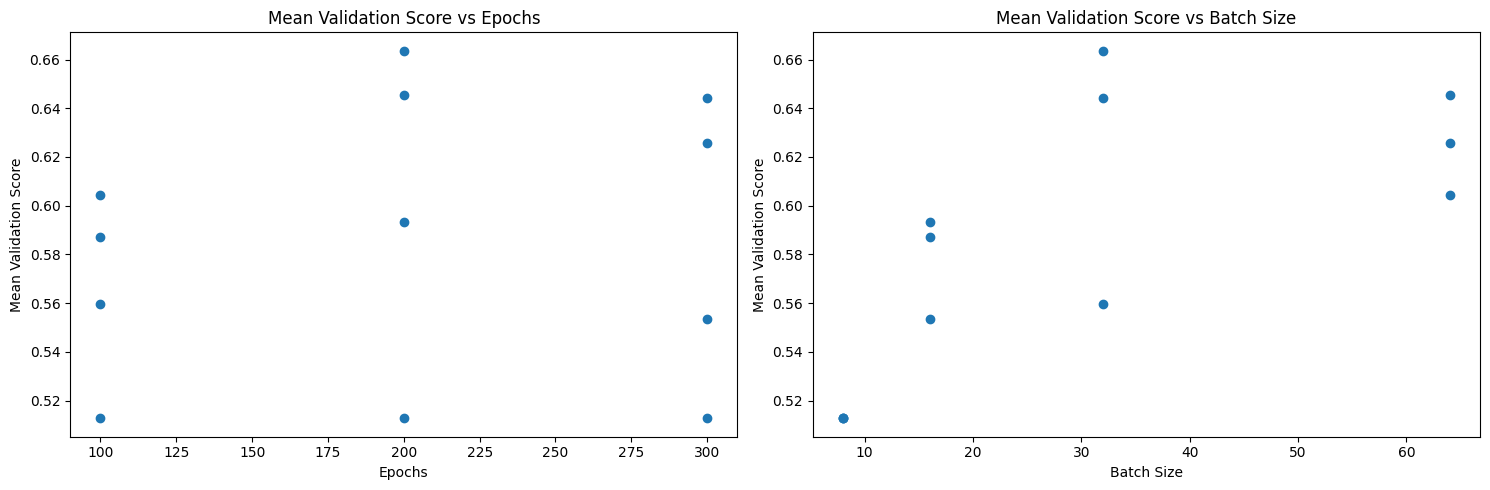

In [152]:
# import matplotlib.pyplot as plt
# import numpy as np

# mean_scores = grid_result.cv_results_['mean_test_score']
# params = grid_result.cv_results_['params']

# epochs = [param['epochs'] for param in params]
# batch_sizes = [param['batch_size'] for param in params]

# fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# axs[0].scatter(epochs, mean_scores)
# axs[0].set_xlabel('Epochs')
# axs[0].set_ylabel('Mean Validation Score')
# axs[0].set_title('Mean Validation Score vs Epochs')

# axs[1].scatter(batch_sizes, mean_scores)
# axs[1].set_xlabel('Batch Size')
# axs[1].set_ylabel('Mean Validation Score')
# axs[1].set_title('Mean Validation Score vs Batch Size')

# plt.tight_layout()
# plt.show()

In [153]:
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.663609 using {'batch_size': 32, 'epochs': 200}
0.512742 (0.001442) with: {'batch_size': 8, 'epochs': 100}
0.512742 (0.001442) with: {'batch_size': 8, 'epochs': 200}
0.512742 (0.001442) with: {'batch_size': 8, 'epochs': 300}
0.587156 (0.053378) with: {'batch_size': 16, 'epochs': 100}
0.593272 (0.058184) with: {'batch_size': 16, 'epochs': 200}
0.553517 (0.056223) with: {'batch_size': 16, 'epochs': 300}
0.559633 (0.006606) with: {'batch_size': 32, 'epochs': 100}
0.663609 (0.022885) with: {'batch_size': 32, 'epochs': 200}
0.644241 (0.031020) with: {'batch_size': 32, 'epochs': 300}
0.604485 (0.038709) with: {'batch_size': 64, 'epochs': 100}
0.645260 (0.025341) with: {'batch_size': 64, 'epochs': 200}
0.625892 (0.025011) with: {'batch_size': 64, 'epochs': 300}


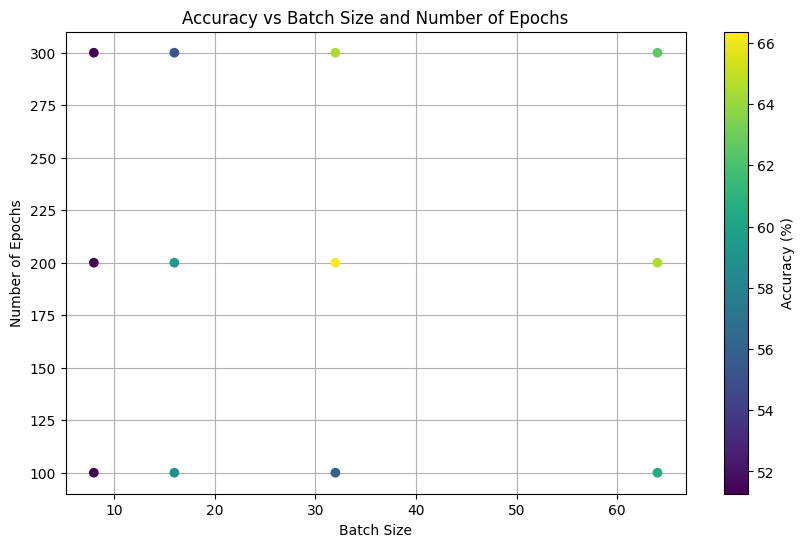

In [154]:
# mean_scores = grid_result.cv_results_['mean_test_score']
# params = grid_result.cv_results_['params']

# epochs = np.array([param['epochs'] for param in params])
# batch_sizes = np.array([param['batch_size'] for param in params])
# accuracy = mean_scores * 100  

# plt.figure(figsize=(10, 6))
# scatter = plt.scatter(batch_sizes, epochs, c=accuracy, cmap='viridis', marker='o', zorder=2)

# cbar = plt.colorbar(scatter)
# cbar.set_label('Accuracy (%)')
# plt.xlabel('Batch Size')
# plt.ylabel('Number of Epochs')
# plt.title('Accuracy vs Batch Size and Number of Epochs')

# plt.grid(True)
# plt.show()

In [155]:
# best_model = grid_result.best_estimator_.model

In [161]:
model = KerasClassifier(model=create_baseline, epochs=200, batch_size=32, verbose=1)

In [162]:
best_model = model.fit(X_train, y_train, validation_data=(X_val, y_val))

Epoch 1/200
31/31 [==============================] - 1s 6ms/step - loss: 11.2588 - accuracy: 0.5474 - val_loss: 4.3699 - val_accuracy: 0.5107
Epoch 2/200
31/31 [==============================] - 0s 3ms/step - loss: 2.9578 - accuracy: 0.5015 - val_loss: 2.5837 - val_accuracy: 0.5138
Epoch 3/200
31/31 [==============================] - 0s 2ms/step - loss: 2.4957 - accuracy: 0.5107 - val_loss: 3.7476 - val_accuracy: 0.5138
Epoch 4/200
31/31 [==============================] - 0s 3ms/step - loss: 1.9424 - accuracy: 0.5260 - val_loss: 0.8515 - val_accuracy: 0.5291
Epoch 5/200
31/31 [==============================] - 0s 3ms/step - loss: 1.3607 - accuracy: 0.5341 - val_loss: 0.8439 - val_accuracy: 0.5535
Epoch 6/200
31/31 [==============================] - 0s 2ms/step - loss: 1.0231 - accuracy: 0.5790 - val_loss: 1.2224 - val_accuracy: 0.5474
Epoch 7/200
31/31 [==============================] - 0s 2ms/step - loss: 0.9091 - accuracy: 0.6065 - val_loss: 1.1027 - val_accuracy: 0.5505
Epoch 8/200


In [163]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

11/11 [==============================] - 0s 2ms/step
Accuracy: 0.7164634146341463
F1 Score: 0.7223880597014926
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       156
           1       0.74      0.70      0.72       172

    accuracy                           0.72       328
   macro avg       0.72      0.72      0.72       328
weighted avg       0.72      0.72      0.72       328

Confusion Matrix:
[[114  42]
 [ 51 121]]


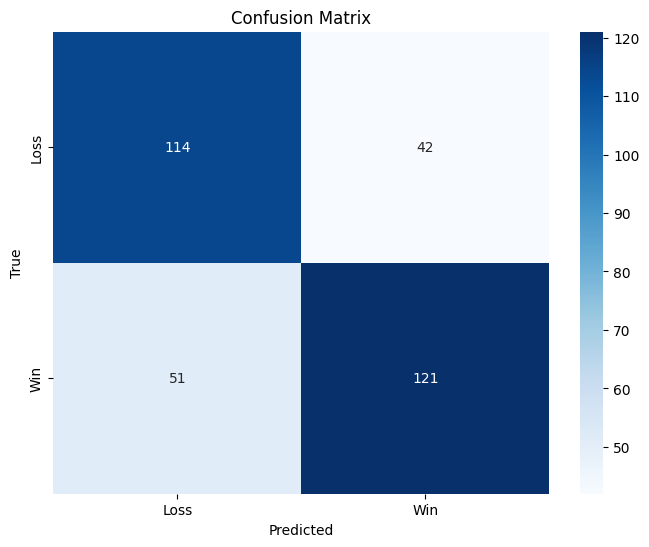

In [166]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


cm = confusion_matrix(y_test, y_pred)

classes = ['Loss', 'Win']  

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()